<a href="https://colab.research.google.com/github/JarekMaleszyk/data-science-project-sandbox/blob/main/MAGIC_Gamma_Telescope_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data from https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
N_NEIGHBORS = 5

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'] = [1 if x == 'g' else 0 for x in df['class']]
df['class'] = df['class'].astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
# for label in df.columns[:-1]:
#   plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
#   plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
#   plt.title(label)
#   plt.ylabel('Probability')
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()

## Train, validation, test dataset

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]))

7349
4063


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [ ]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

7349
7349


In [ ]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(y_test)
print(y_pred)

[1 0 0 ... 1 0 0]
[0 0 1 ... 1 0 0]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1319
           1       0.86      0.85      0.85      2485

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(y_test)
print(y_pred)

[1 0 0 ... 1 0 0]
[1 1 1 ... 1 1 1]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1319
           1       0.74      0.89      0.81      2485

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



## Logistic Regression
sigmoid function

x0 - simple logistic regression

x0, x1, x2, ..., xn - multiply logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)
print(y_test)
print(y_pred)

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1319
           1       0.84      0.81      0.83      2485

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_model.predict(X_test)
print(y_test)
print(y_pred)

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1319
           1       0.89      0.90      0.89      2485

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(X_train, y_train, number_nodes, dropout_prob, learning_rate, validation_split, batch_size, epochs, verbose=0):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(number_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(number_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
      ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

  history = nn_model.fit(X_train,
                       y_train,
                       validation_split=validation_split,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=verbose
                       )

  return nn_model, history


In [ ]:
def plot_history(history):
  # summarize history for loss
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_ylabel('loss')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='upper left')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_ylabel('accuracy')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')
  ax2.grid(True)

  plt.show()

number_nodes: 16, dropout_prob: 0.2, learning_rate: 0.005, batch_size: 64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


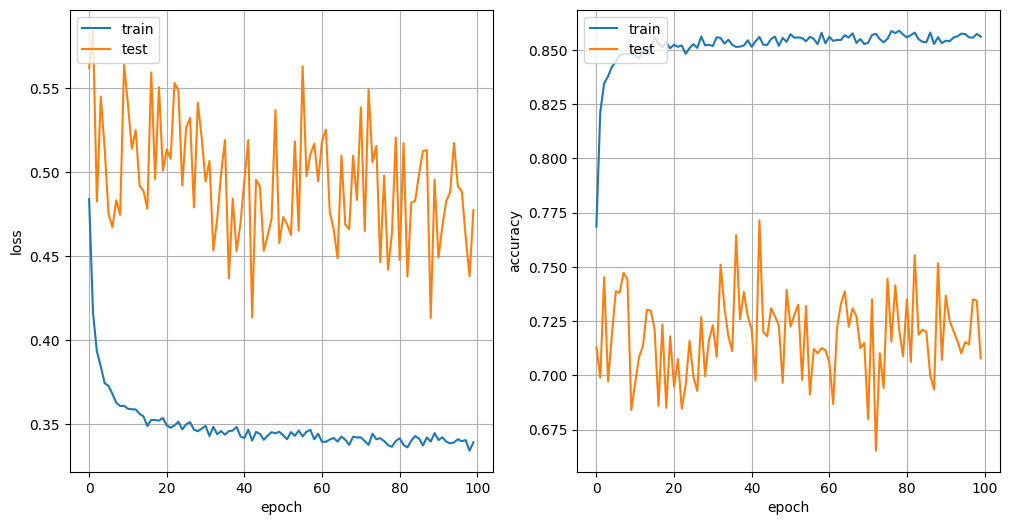

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3182
Validation loss: 0.31394967436790466


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
batch_size = 64
dropout_prob = 0.2
number_nodes = 16
learning_rate = 0.005
EPOCHS=100
VALIDATION_SPLIT=0.2

print(f"number_nodes: {number_nodes}, dropout_prob: {dropout_prob}, learning_rate: {learning_rate}, batch_size: {batch_size}")
model, history = train_model(X_train, y_train, number_nodes, dropout_prob, learning_rate, VALIDATION_SPLIT, batch_size, EPOCHS)
plot_history(history)
val_loss = model.evaluate(X_valid, y_valid)[0]
print(f"Validation loss: {val_loss}")
if val_loss < least_val_loss:
  least_val_loss = val_loss
  least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1319
           1       0.86      0.96      0.91      2485

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [ ]:
print(type(model))
print(type(history))

<class 'keras.src.models.sequential.Sequential'>
<class 'keras.src.callbacks.history.History'>
